In [36]:
#Sean Fitzgibbon - 19273444, Daniel Larkin - 19257503, Adam Butler - 19244967
#The code in this file executes to the end without error.
#We opted to re-use existing implementation of DQN for the Cartpole control problem in a tutorial format, which is sourced from the following link: https://github.com/ChaithanyaVamshi/CartPole-DQN-Reinforcementlearning
#Some lines have been changed to suit latest API versions and avoid warnings

#Install keras rl2 which seamlessly integrates with the  OpenAI Gym  to evaluate and play around with DQN Algorithm
!pip install keras-rl2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
#Install Open AI Gym for the Cart Pole Environment
!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
#Import the gym module
#Import Matplotlib to visualize the training steps
#Import the Keras modules for creating deep neural networks

import gym
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Input, Flatten, Dense
     

In [ ]:
#Create cartpole environment
ENV_NAME = 'CartPole-v0'
env = gym.make(ENV_NAME)

In [40]:
#Action Logger class, removed in final version
#from rl.callbacks import Callback
#
#class ActionLogger(Callback):
#    def __init__(self, interval=1):
#        self.interval = interval
#        self.actions = []
#
#    def on_step_end(self, step, logs={}):
#        if step % self.interval == 0:
#            self.actions.append(logs['action'])

In [41]:
import rl
from rl.memory import SequentialMemory
from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

#logger = ActionLogger(interval=1)

#Experience replay buffer
memory = SequentialMemory(limit=50000, window_length=1)

#Create Linear annealed policy with the EpsGreedyQPolicy as inner policy
policy =  LinearAnnealedPolicy(inner_policy=  EpsGreedyQPolicy(),   # policy used to select actions
                               attr='eps',                              
                               value_max=1.0,                       
                               value_min=0.1,                       
                               value_test=0.05,                     
                               nb_steps=10000)                      

#Feed-Forward Neural Network Model for Deep Q Learning (DQN)
model = Sequential()
#Input is 1 observation vector, and the number of observations in that vector 
model.add(Input(shape=(1,env.observation_space.shape[0])))  
model.add(Flatten())
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
#Output is the number of actions in the action space
model.add(Dense(env.action_space.n, activation='linear')) 

#Model summary
print(model.summary())

#Create DQN Agent for DQN Model
dqn = DQNAgent(model=model,                     # Q-Network model
               nb_actions=env.action_space.n,   # number of actions
               memory=memory,                   # experience replay memory
               nb_steps_warmup=25,              # how many steps are waited before starting experience replay
               target_model_update=1e-2,        # how often the target network is updated
               policy=policy)                   # the action selection policy

#Compile the agent           
from tensorflow.keras.optimizers import Adam
dqn.compile(Adam(learning_rate=1e-3), metrics=['mae','accuracy'])

#Fit and train agent
history = dqn.fit(env, nb_steps=50000, visualize=False, verbose=2) #Removed ActionLog due to non-satisfactory result, irrelevant

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 4)                 0         
                                                                 
 dense_27 (Dense)            (None, 24)                120       
                                                                 
 dense_28 (Dense)            (None, 24)                600       
                                                                 
 dense_29 (Dense)            (None, 2)                 50        
                                                                 
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________
None
Training for 50000 steps ...


/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    15/50000: episode: 1, duration: 0.238s, episode steps:  15, steps per second:  63, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.733 [0.000, 1.000],  loss: --, mae: --, accuracy: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.8/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/lib/python3.8/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 26 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.8/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 27 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)

    40/50000: episode: 2, duration: 1.479s, episode steps:  25, steps per second:  17, episode reward: 25.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.480 [0.000, 1.000],  loss: 0.452769, mae: 0.528568, accuracy: 0.587054, mean_q: -0.015767, mean_eps: 0.997075
    56/50000: episode: 3, duration: 0.170s, episode steps:  16, steps per second:  94, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.375 [0.000, 1.000],  loss: 0.331112, mae: 0.464991, accuracy: 0.525391, mean_q: 0.209095, mean_eps: 0.995725
    89/50000: episode: 4, duration: 0.337s, episode steps:  33, steps per second:  98, episode reward: 33.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.667 [0.000, 1.000],  loss: 0.239517, mae: 0.521778, accuracy: 0.532197, mean_q: 0.451248, mean_eps: 0.993520
   120/50000: episode: 5, duration: 0.332s, episode steps:  31, steps per second:  93, episode reward: 31.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.516 [0.000, 1.00

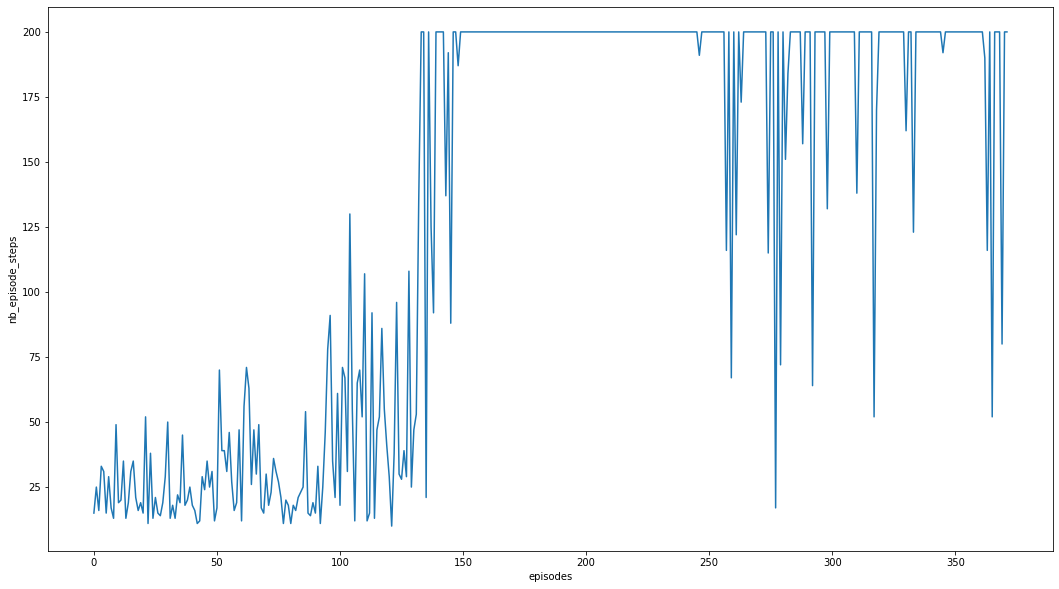

In [48]:
#Visualize reward over cycle of episodes for agent
plt.figure(figsize = (18,10))
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

In [49]:
#Evaluate agent over 20 episodes, we are looking for reward of over 195.0 for 100 consecutive trials to consider problem solved.
dqn.test(env, nb_episodes=100, visualize=False, verbose=2)

Testing for 100 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200
Episode 21: reward: 200.000, steps: 200
Episode 22: reward: 200.000, steps: 200
Episode 23: reward: 200.000, steps: 200
Episode 24: reward: 200.000, steps: 200
Episode 25: reward: 

In [43]:
#Action distribution chart
#actions = logger.actions
#fig = plt.figure()

#plt.hist(actions)
#plt.xlabel('Action')
#plt.ylabel('Frequency')
#plt.title('Action distribution for DQN Agent during training')
#plt.show()

In [44]:
# After training is done, we save the final weights.
dqn.save_weights('dqn_weights.h5f', overwrite=True)